In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import keras.datasets as ks

In [0]:
mnist = tf.keras.datasets.mnist

#mnist = ks.mnist

In [0]:
 (xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [0]:
len(xtrain)

60000

In [0]:
xtrain.shape

(60000, 28, 28)

In [0]:
xtrain.ndim

3

In [0]:
xtrain[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
ytrain[2000]

5

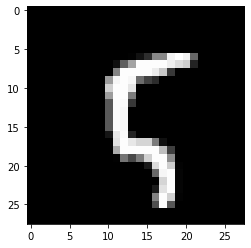

In [0]:
plt.imshow(xtrain[100],cmap='gray')
plt.show()

In [0]:
##### Scale the data
xtrain = xtrain/255
xtest = xtest/255

In [0]:
xtrain[20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
#### Create the model
model = tf.keras.models.Sequential()

In [0]:
### Adding the layer
model.add(tf.keras.layers.Flatten())  #### Input layer
model.add(tf.keras.layers.Dense(784,activation='relu'))   ### hidden layers 784 = 28*28
model.add(tf.keras.layers.Dense(640,activation='relu'))   ### hidden layers
model.add(tf.keras.layers.Dense(64,activation='relu'))    ### hidden layers
model.add(tf.keras.layers.Dense(10,activation='softmax')) ### output layers

In [0]:
#### Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
### Train the model
#model.fit(xtrain,ytrain,epochs=5)
model.fit(xtrain,ytrain,epochs=5,batch_size=40)

Epoch 1/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1886 - accuracy: 0.9426
Epoch 2/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0857 - accuracy: 0.9740
Epoch 3/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0601 - accuracy: 0.9814
Epoch 4/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0458 - accuracy: 0.9860
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0393 - accuracy: 0.9876


In [0]:
predictions = model.predict(xtest)

In [0]:
ytest[200]

3

In [0]:
predictions[200]

array([1.7811927e-06, 2.7689804e-05, 7.3326158e-04, 9.9054396e-01,
       2.1897065e-05, 3.3547271e-03, 2.2703892e-08, 5.1151012e-05,
       1.1023260e-03, 4.1631511e-03], dtype=float32)

In [0]:
np.argmax(predictions[200])

3

In [0]:
plt.imshow(xtest[200],cmap='gray')
plt.show()

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(np.argmax(predictions[i]))
  plt.imshow(xtest[i],cmap='gray')
plt.show()

In [0]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.0983 - accuracy: 0.9732


[0.09830684214830399, 0.9732000231742859]

In [0]:
import cv2

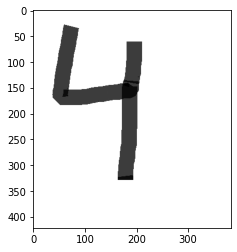

In [0]:
### Convert image to array and convert to grayscale
img_array = cv2.imread('3.png',cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
plt.imshow(img_array,cmap=plt.cm.binary) 

In [0]:
img_array.shape

(422, 383)

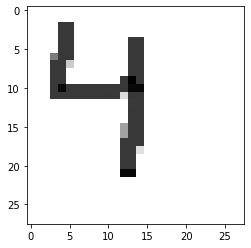

In [0]:
### making the shape of the image to 28*28
new_array = cv2.resize(img_array,(28,28))
plt.imshow(new_array,cmap=plt.cm.binary)

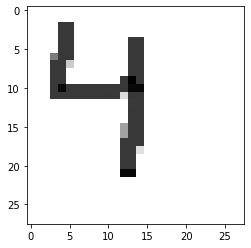

In [0]:
#### Scale the image
test_image = new_array/255
plt.imshow(test_image,cmap=plt.cm.binary)

In [0]:
predicted_image = model.predict(np.array([[test_image]]))
predicted_image

array([[2.7351642e-05, 1.2303674e-02, 1.6504552e-02, 2.8869468e-03,
        2.5345926e-05, 2.9125225e-04, 9.8527335e-06, 8.0371708e-01,
        1.6411096e-01, 1.2294858e-04]], dtype=float32)

In [0]:
np.argmax(predicted_image)

7